In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from sklearn.metrics import confusion_matrix, accuracy_score
from pycaret.classification import *

In [2]:
seed = 42
np.random.seed(seed)
set_config('seed', seed)

# 1. 데이터 로드

In [3]:
train=pd.read_csv('input/train.csv', index_col=0) #인덱스 col=0도 check!
test=pd.read_csv('input/test.csv', index_col=0)
submission=pd.read_csv('input/sample_submission.csv', index_col=0)  

In [4]:
train['income']=pd.factorize(train['income'], sort=True)[0]

In [ ]:
train.shape, test.shape

In [ ]:
train.head(3)
test.head(3)

# 2. EDA & 전처리

In [ ]:
train.info()
train.describe()
train.describe(include='O')

In [ ]:
df = pd.concat([train, test])
df.shape

In [ ]:
train.info

## Missing Value

In [ ]:
train.isnull().sum().sum()
test.isnull().sum().sum()

## CovariateShift

### outlier

# 3. 모델 학습

In [ ]:
import gc
gc.collect()

In [ ]:
train.columns

In [5]:
%%time
clf = setup(session_id=seed, 
            data = train, target = 'income'
          #, categorical_features=col_cat
          , numeric_features = ['education_num']
          #, ignore_features =tp.tolist() + wr.tolist() + wf.tolist()#'religion', 'race_1', 'race_2', 'race_3','race_4', 'race_5', 'race_6']
           )

Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(26049, 15)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Wall time: 13.7 s


In [6]:
best_3 = compare_models(sort = 'F1', n_select = 3
                       ,exclude=['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'ridge','qda']
                       #,exclude=['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'gpc', 'mlp', 'ridge', 'rf', 'qda', 'ada', 'xgboost']
                       )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8687,0.9248,0.6416,0.7778,0.7027,0.6194,0.6245,10.9559
1,Light Gradient Boosting Machine,0.8652,0.9217,0.6478,0.7599,0.6993,0.6131,0.6164,0.2928
2,Extreme Gradient Boosting,0.8644,0.9217,0.6471,0.7575,0.6978,0.6111,0.6144,2.4354
3,Gradient Boosting Classifier,0.8625,0.9200,0.6067,0.7765,0.6810,0.5951,0.6025,2.4155
4,Ada Boost Classifier,0.8572,0.9135,0.6170,0.7492,0.6765,0.5860,0.5907,0.8562
5,Random Forest Classifier,0.8423,0.8788,0.5639,0.7237,0.6337,0.5352,0.5421,0.1257
6,Linear Discriminant Analysis,0.8386,0.8917,0.5626,0.7109,0.6276,0.5264,0.5326,0.2026
7,Extra Trees Classifier,0.8283,0.8756,0.5957,0.6615,0.6266,0.5155,0.5169,0.6184
8,Decision Tree Classifier,0.8085,0.7424,0.6141,0.6032,0.6082,0.4816,0.4819,0.1038
9,Ridge Classifier,0.8362,0.0000,0.5057,0.7353,0.5986,0.5002,0.5144,0.0402


In [7]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8653,0.9236,0.6424,0.7635,0.6977,0.6118,0.6156
1,0.8664,0.9192,0.6521,0.7618,0.7027,0.6172,0.6203
2,0.8566,0.9216,0.6165,0.7471,0.6755,0.5846,0.5890
3,0.8770,0.9319,0.6434,0.8086,0.7166,0.6393,0.6461
4,0.8719,0.9238,0.6683,0.7720,0.7164,0.6342,0.6369
Mean,0.8674,0.9240,0.6445,0.7706,0.7018,0.6174,0.6216
SD,0.0068,0.0043,0.0168,0.0206,0.0151,0.0193,0.0197


In [8]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8733,0.9289,0.6586,0.7835,0.7156,0.6349,0.6389


In [9]:
%%time
final_model = finalize_model(blended)

Wall time: 3min 30s


In [10]:
predictions = predict_model(final_model, data = test)

# 4. 예측

In [13]:
submission['prediction'] = predictions['Label']
submission

,prediction
id,
0,0
1,1
2,0
3,1
4,1
...,...
6507,1
6508,1
6509,0


# 5. 제출

In [14]:
submission.to_csv('output/20201015-1.csv')

In [15]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8583,0.9198,0.5825,0.7759,0.6654,0.5778,0.5874
1,0.8614,0.9166,0.6214,0.7619,0.6845,0.5969,0.6019
2,0.8559,0.9117,0.6117,0.7470,0.6726,0.5814,0.5862
3,0.8621,0.9111,0.6071,0.7727,0.6800,0.5937,0.6007
4,0.8542,0.9110,0.5858,0.7573,0.6606,0.5697,0.5773
5,0.8652,0.9297,0.6052,0.7890,0.6850,0.6011,0.6097
6,0.8699,0.9383,0.6117,0.8043,0.6949,0.6141,0.6234
7,0.8613,0.9183,0.6019,0.7750,0.6776,0.5910,0.5987
8,0.8605,0.9211,0.5890,0.7811,0.6716,0.5852,0.5946
9,0.8762,0.9223,0.6505,0.8008,0.7179,0.6396,0.6453


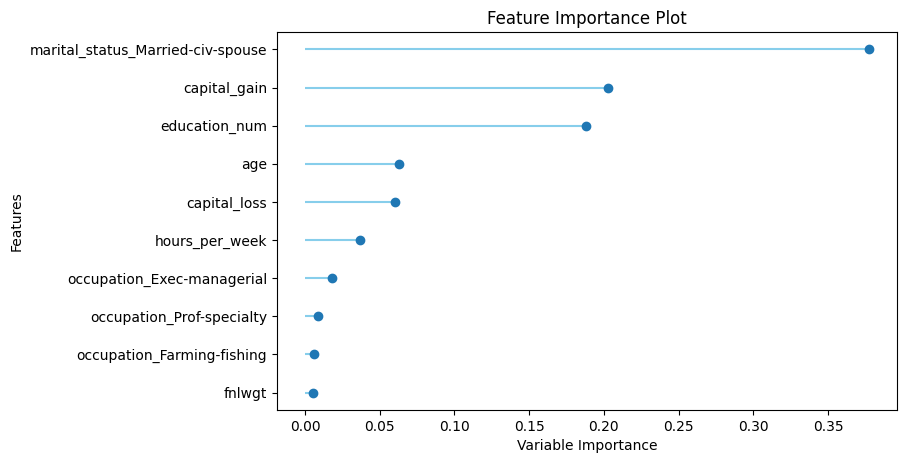

In [16]:
plot_model(estimator = gbc, plot = 'feature')

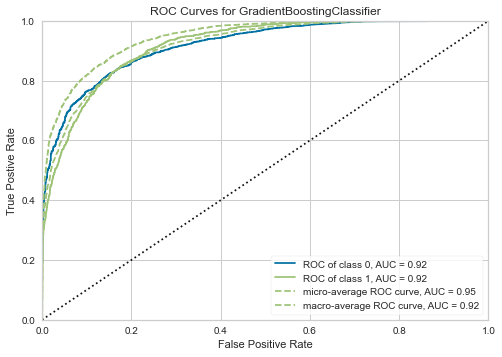

In [17]:
plot_model(estimator = gbc, plot = 'F1')

In [18]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8661,0.9236,0.6472,0.7634,0.7005,0.6150,0.6185
1,0.8622,0.9185,0.6570,0.7436,0.6976,0.6088,0.6107
2,0.8598,0.9169,0.6472,0.7407,0.6908,0.6007,0.6030
3,0.8566,0.9180,0.6201,0.7432,0.6761,0.5850,0.5889
4,0.8542,0.9095,0.6246,0.7338,0.6748,0.5817,0.5848
5,0.8676,0.9324,0.6505,0.7672,0.7040,0.6195,0.6230
6,0.8777,0.9352,0.6667,0.7954,0.7254,0.6475,0.6517
7,0.8636,0.9198,0.6408,0.7586,0.6947,0.6077,0.6113
8,0.8707,0.9235,0.6440,0.7835,0.7069,0.6250,0.6299
9,0.8730,0.9198,0.6796,0.7692,0.7216,0.6398,0.6419


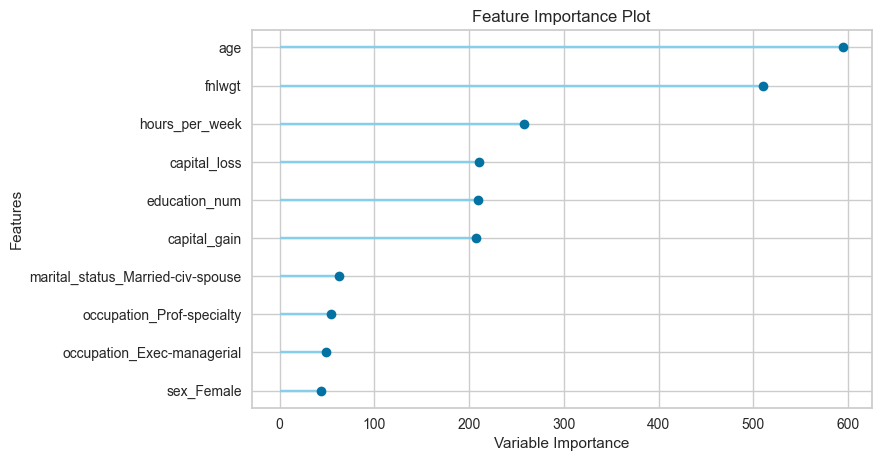

In [19]:
plot_model(estimator = lightgbm, plot = 'feature')